In [10]:
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.table import Table
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sn
import glob
sn.set_context("poster")

In [68]:
def spectra(hduspectra):
    hdu = fits.open(hduspectra)
    hdudata = hdu[0].data
    wl = hdudata[2]
    Flux = hdudata[0]
    Name = hduspectra.split("T/")[-1]
    ra = hdu[0].header["RA"]
    dec = hdu[0].header["DEC"]
    fig, ax = plt.subplots(figsize=(11, 5))
    ax.set(xlim=[3600,10000])
    #plt.ylim(ymin=0.0,ymax=500)
    ax.set(xlabel='Wavelength $(\AA)$')
    ax.set(ylabel='Flux')
    ax.plot(wl, Flux, linewidth=0.8)
    # Label with variable values
    #label = f'File={Name}, RA={ra}, DEC={dec}'  # Using an f-string
    label = f'{Name}, {ra}, {dec}'  # Using an f-string
    ax.text(wl[3500], Flux.max()/1.5, label, fontsize=12, ha='right', va='bottom')

    ax.axvline(6560.28, color='k', linewidth=0.5, linestyle='--', label=r"H$\alpha$")
    ax.axvline(5000.7, color='k', linewidth=0.5, linestyle='-', label="[O III]")
    ax.axvline(4686, color='r', linewidth=0.5, linestyle='-', label="He II")
    #ax.legend()
    plt.show()


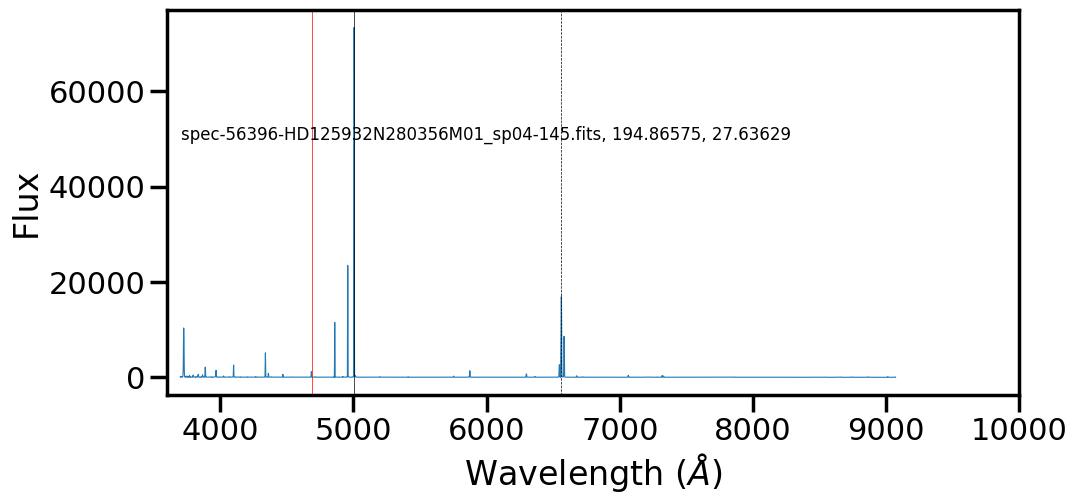

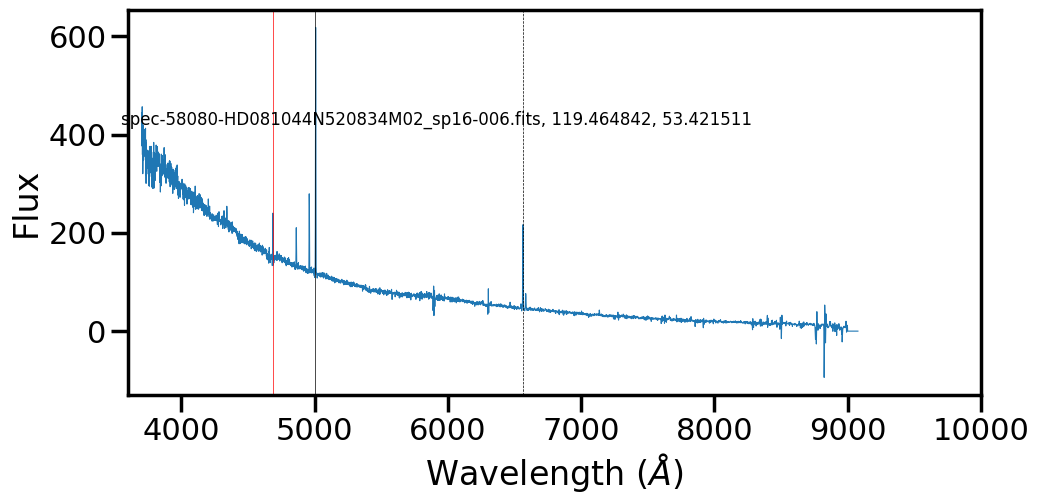

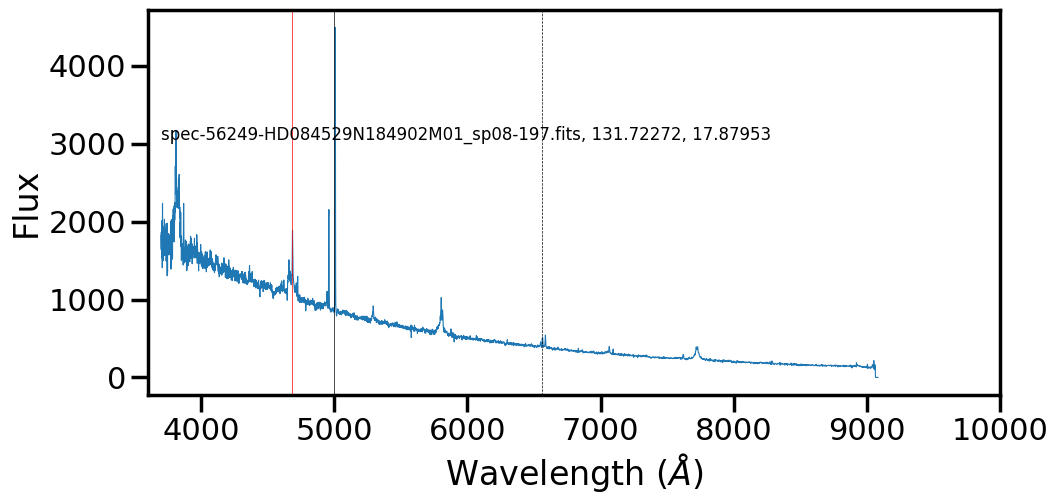

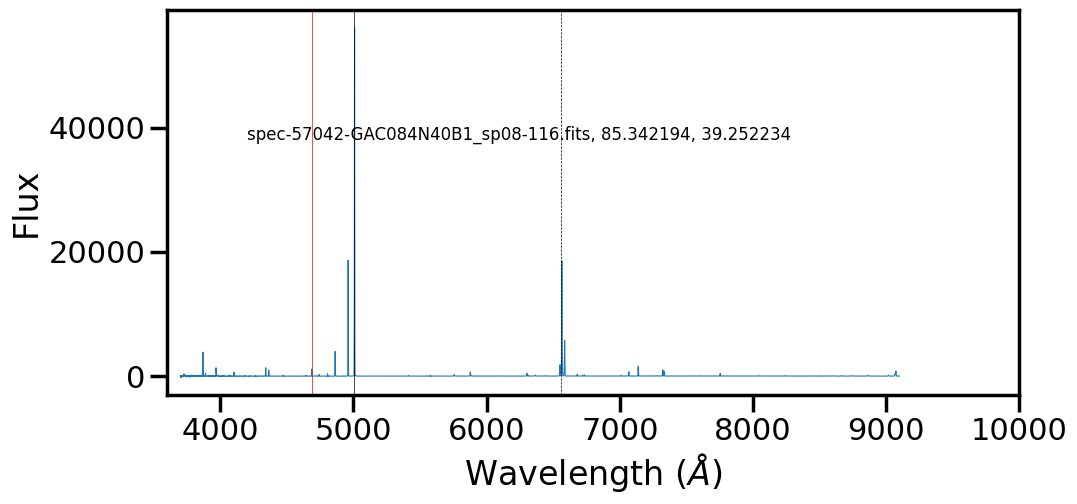

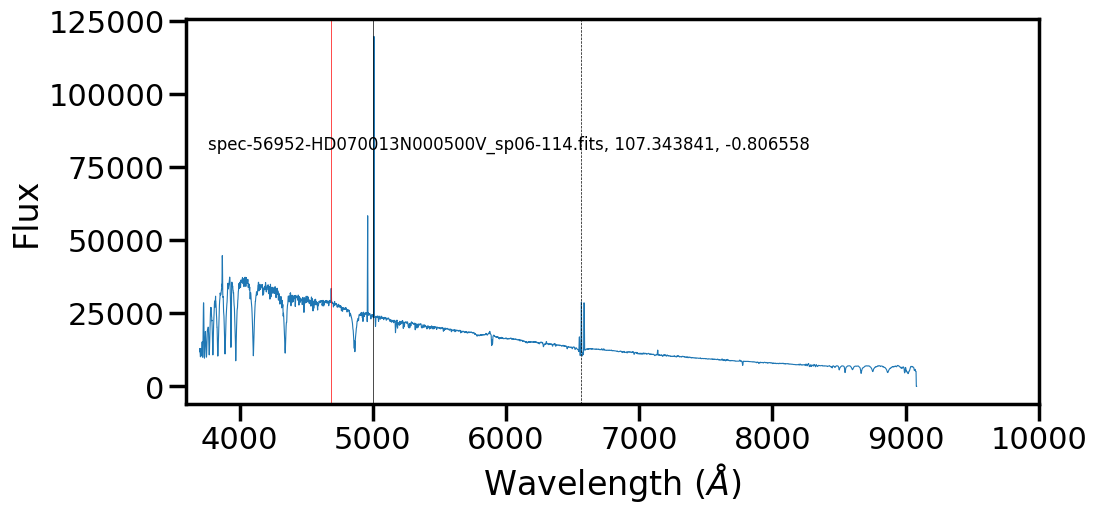

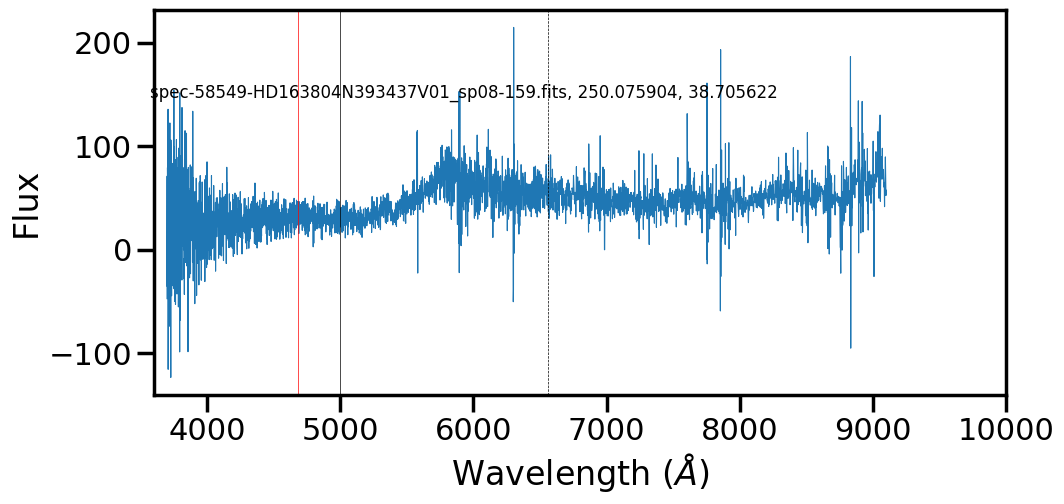

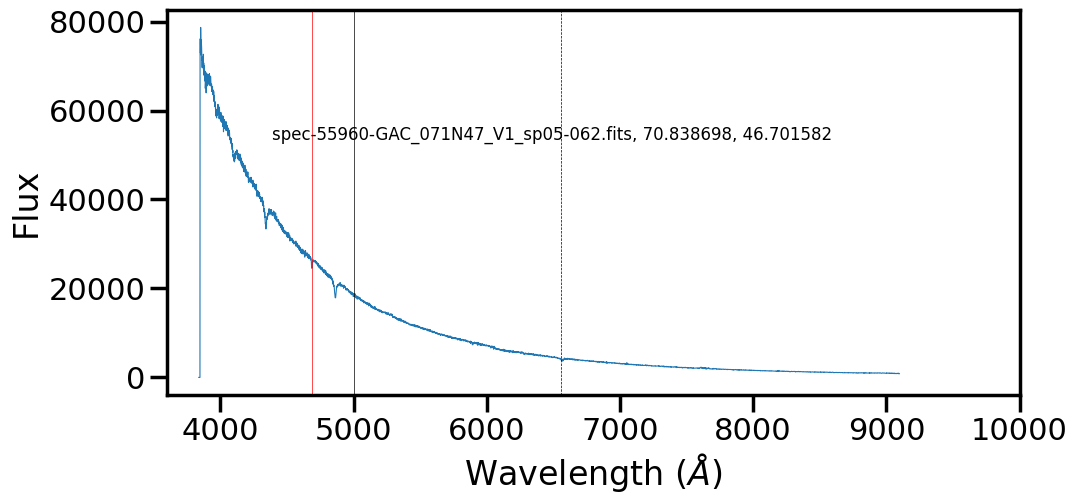

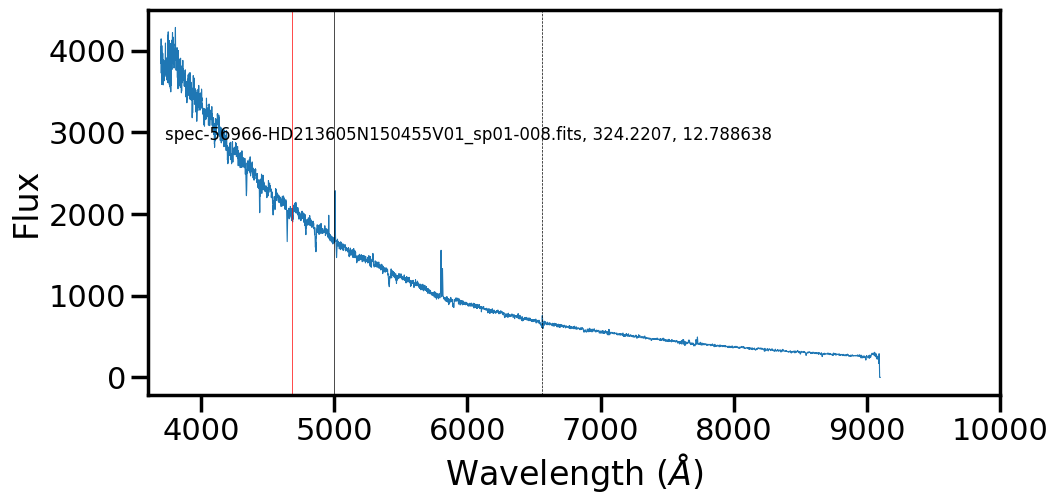

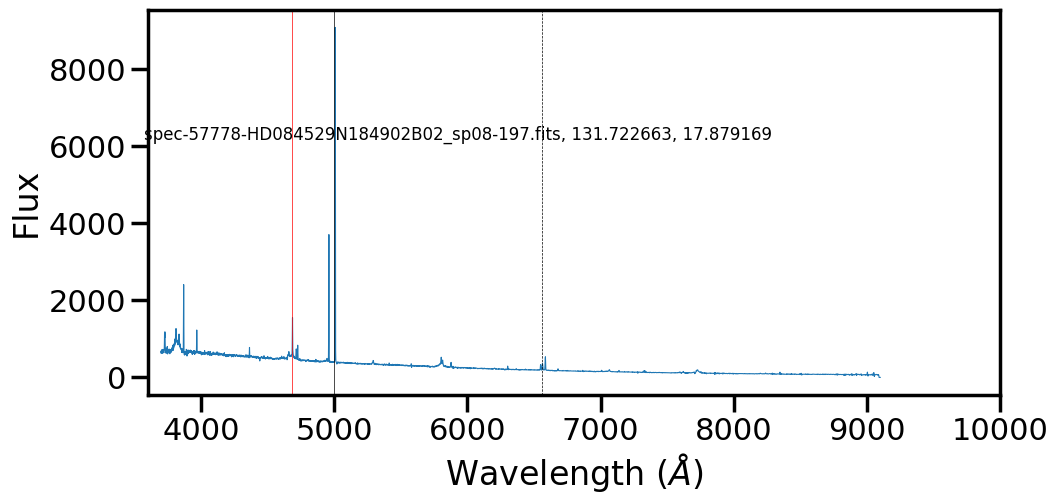

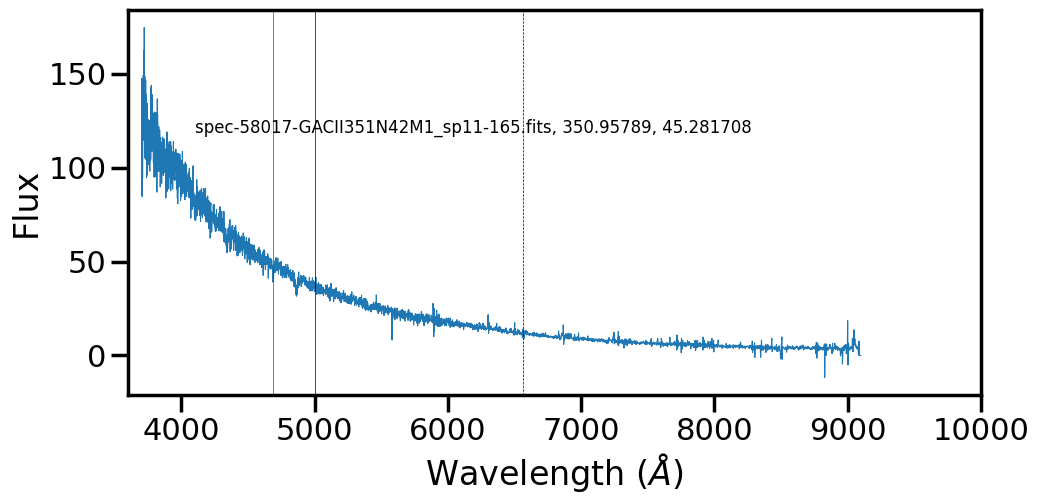

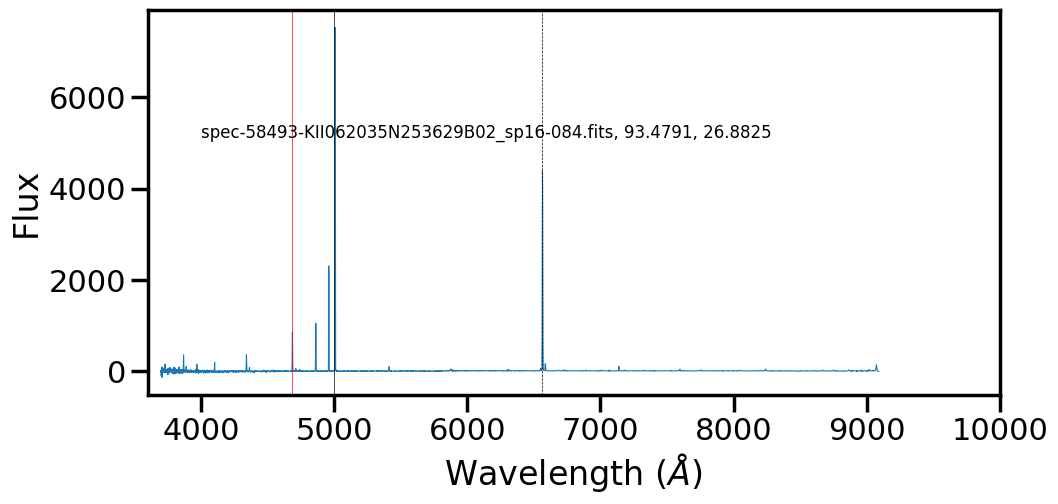

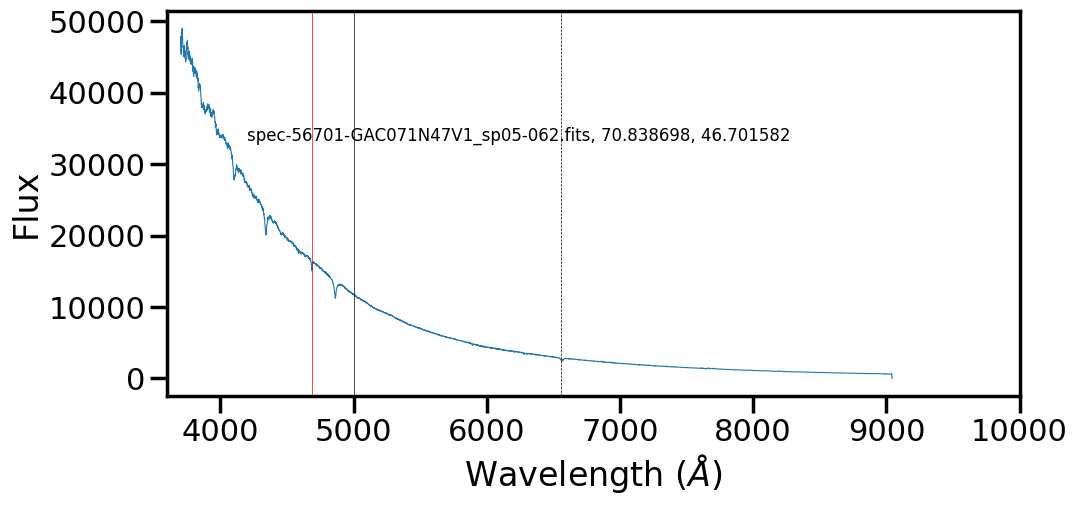

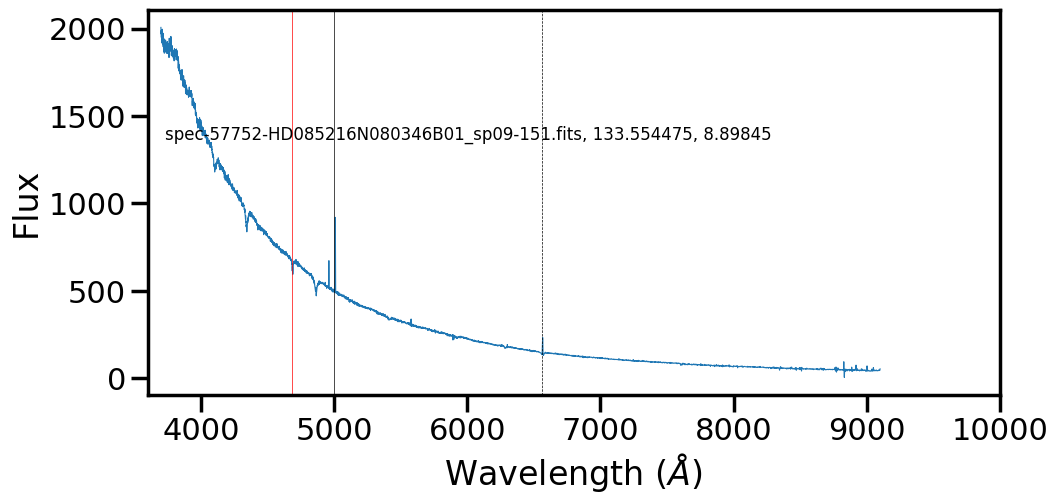

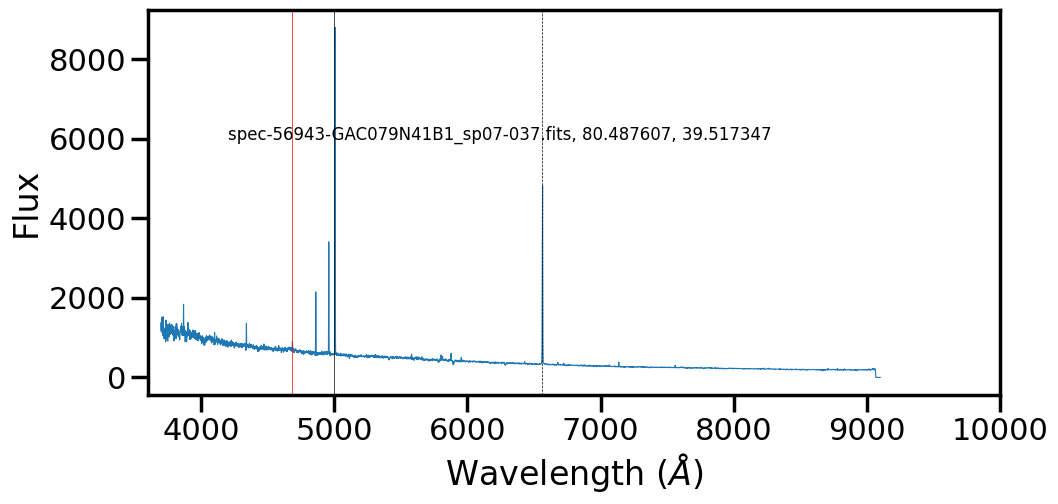

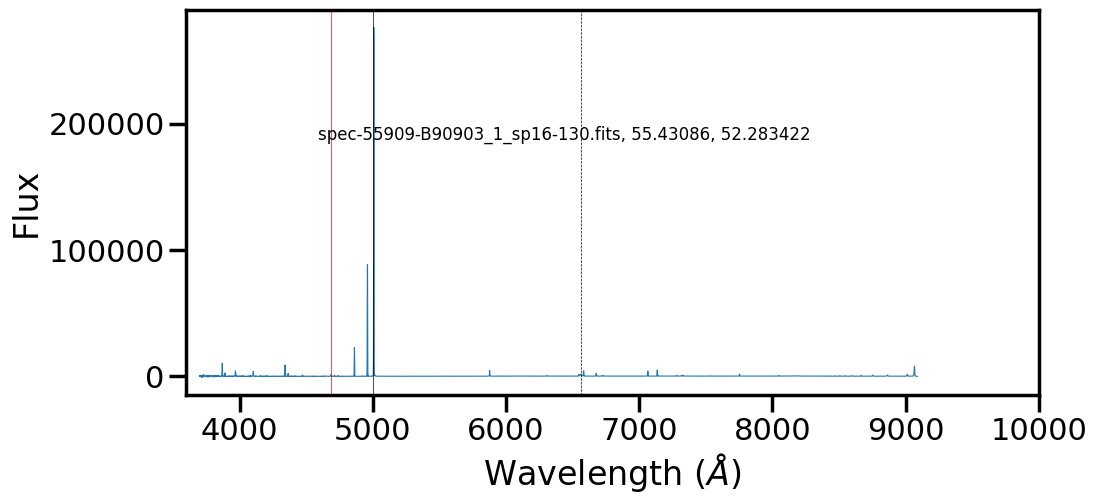

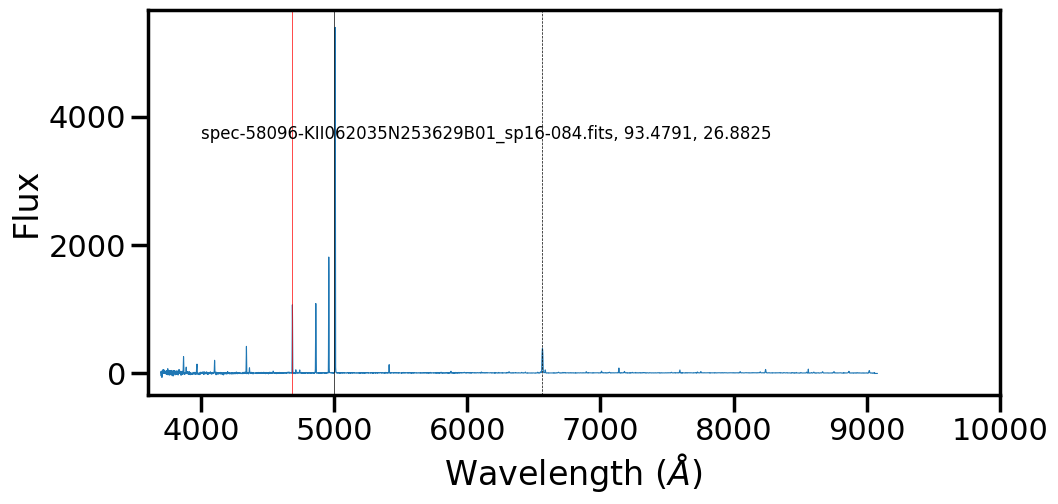

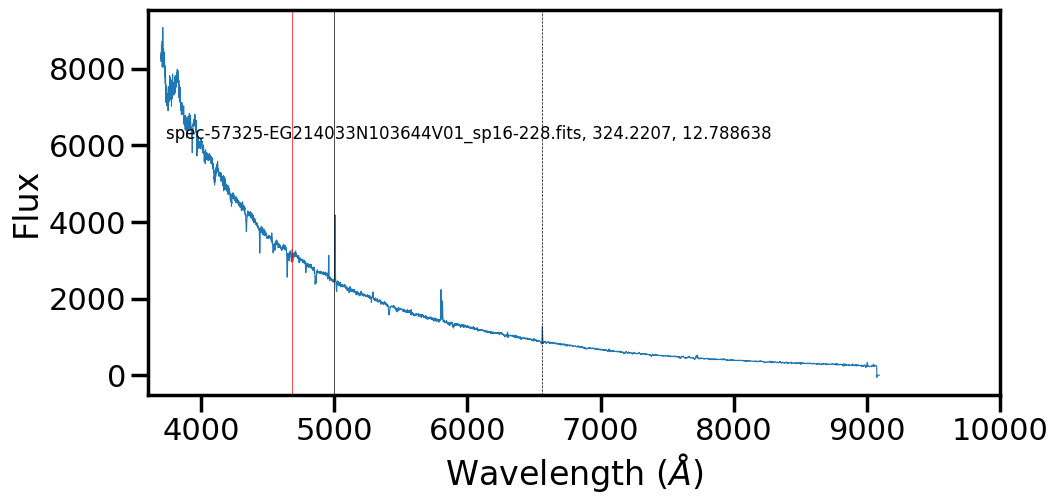

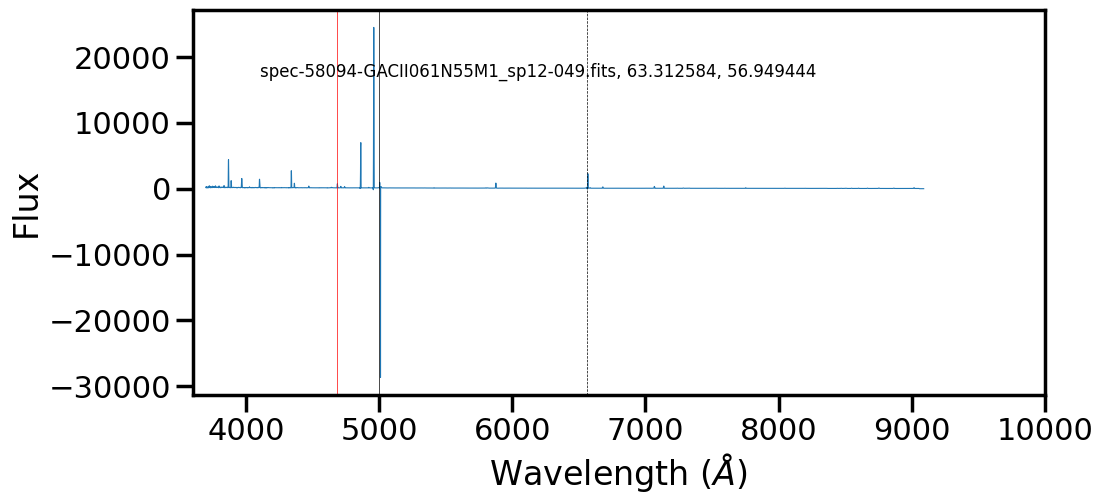

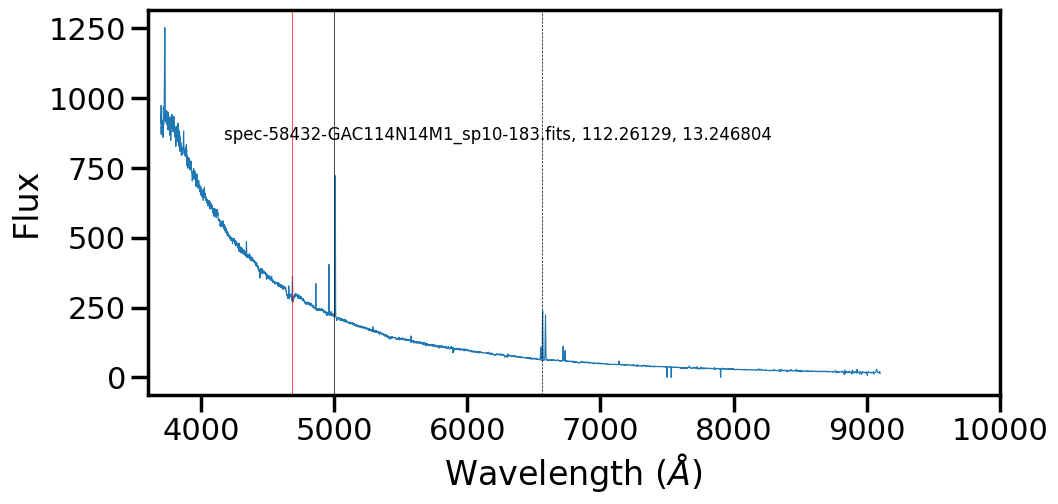

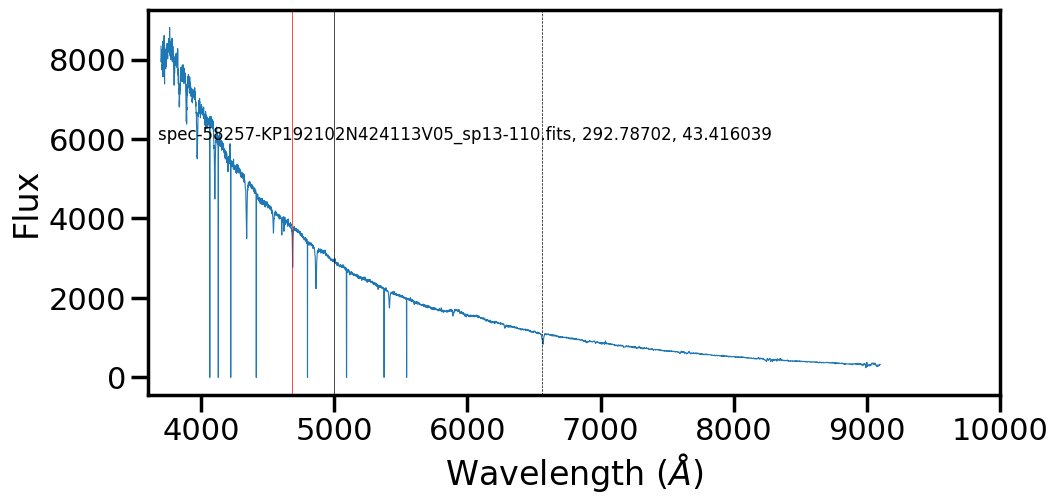

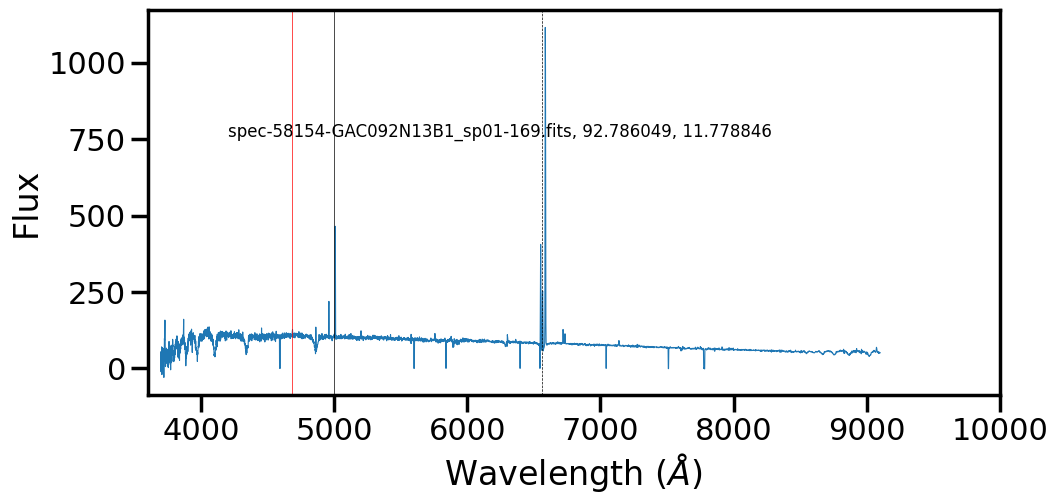

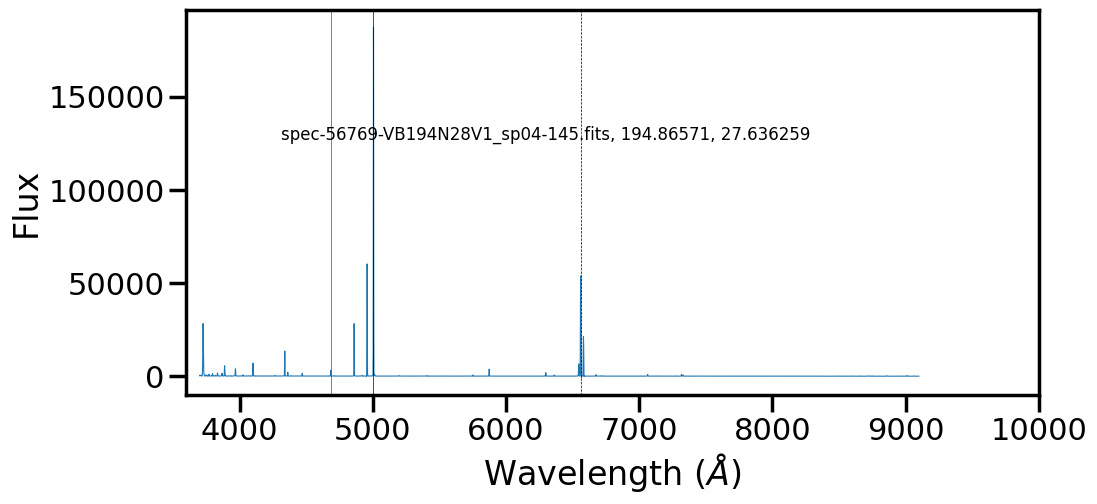

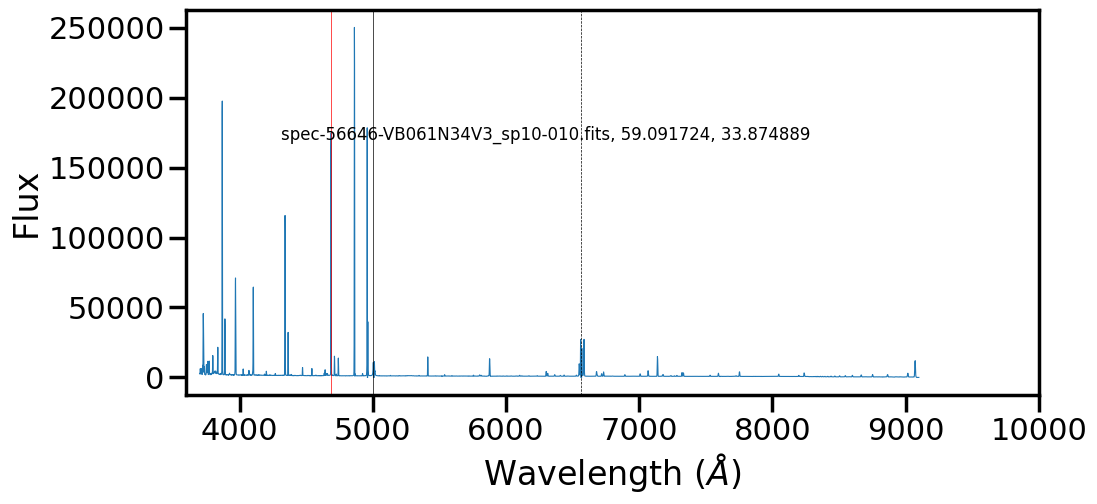

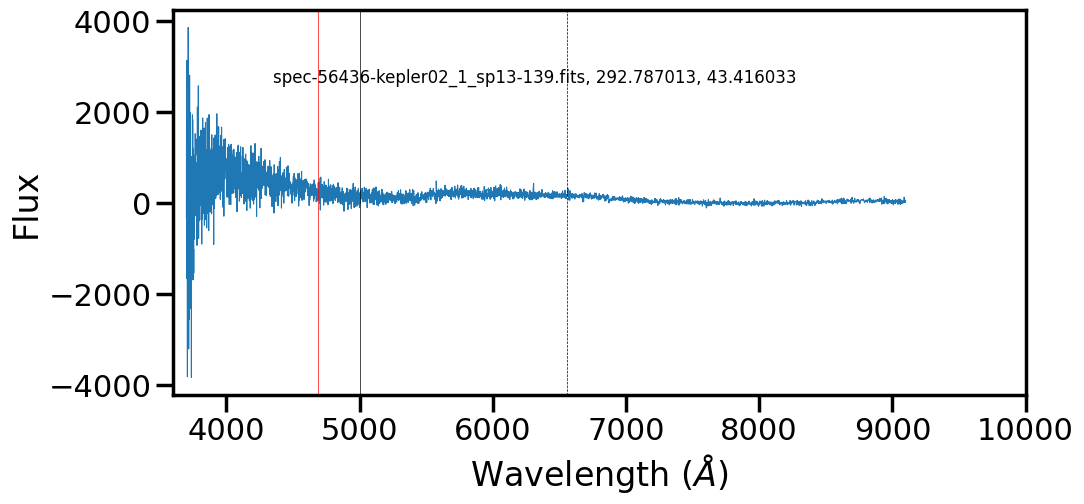

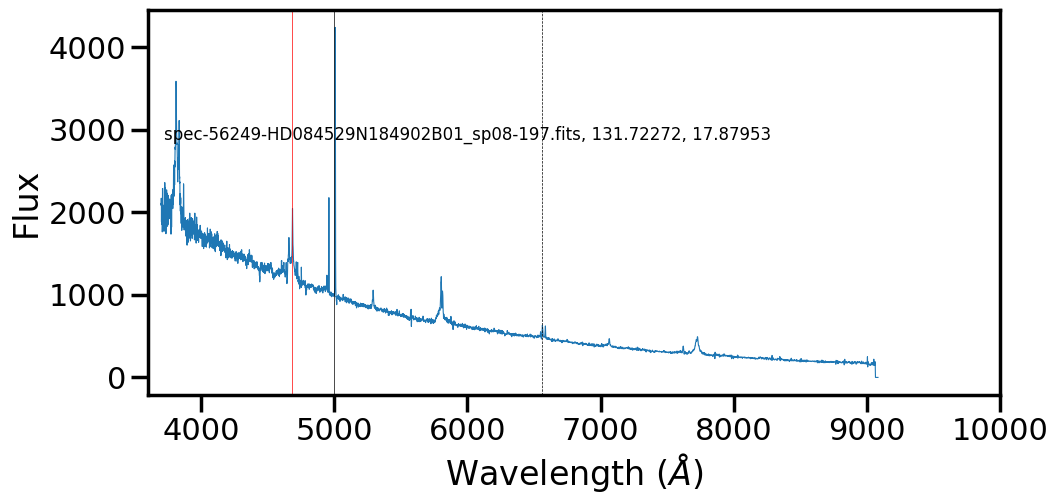

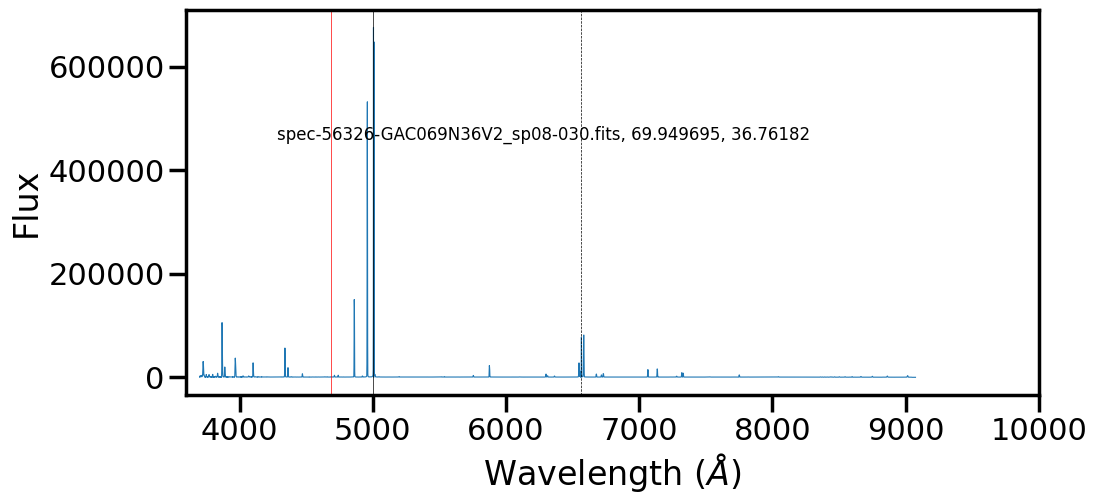

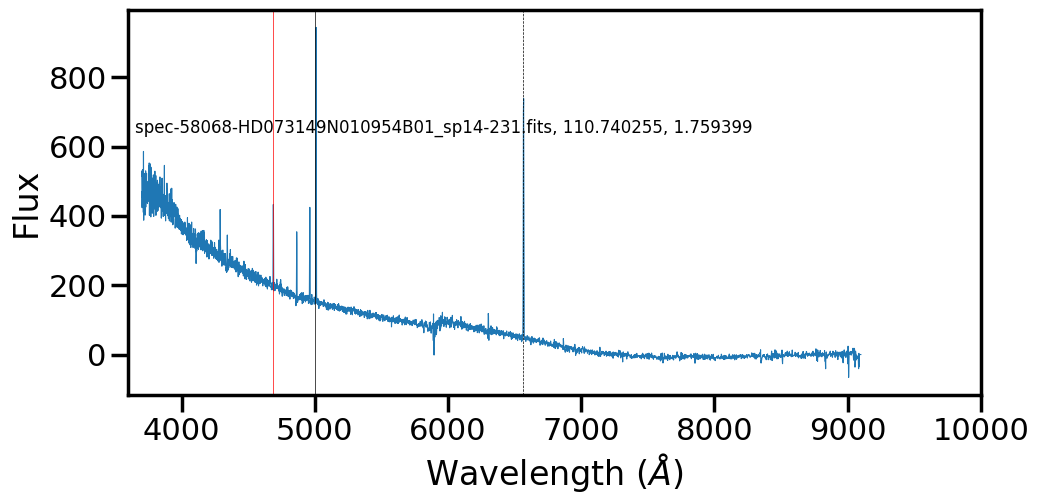

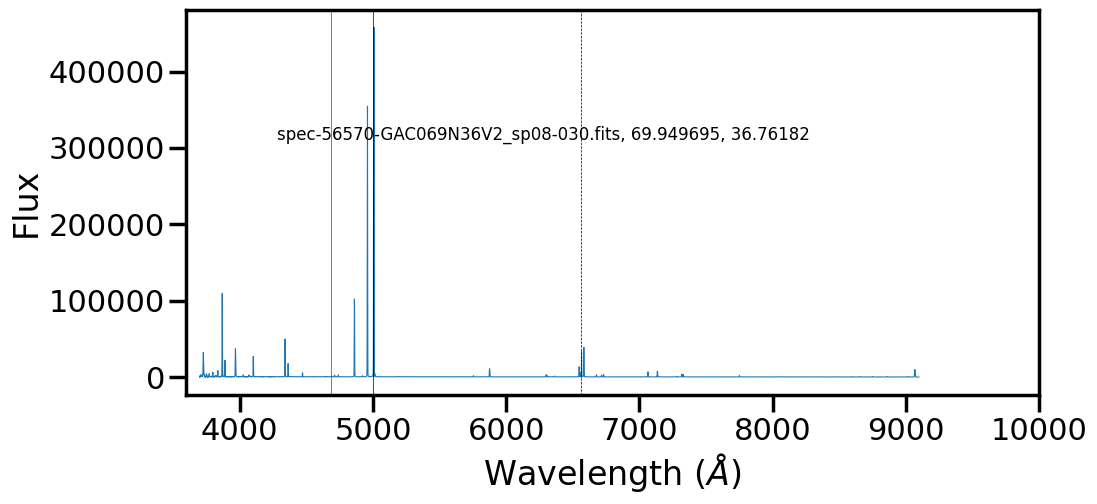

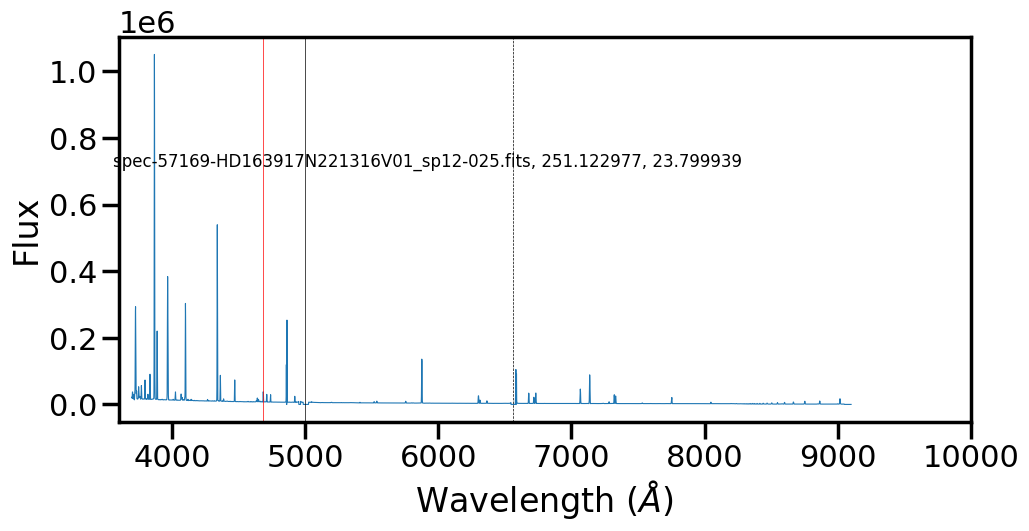

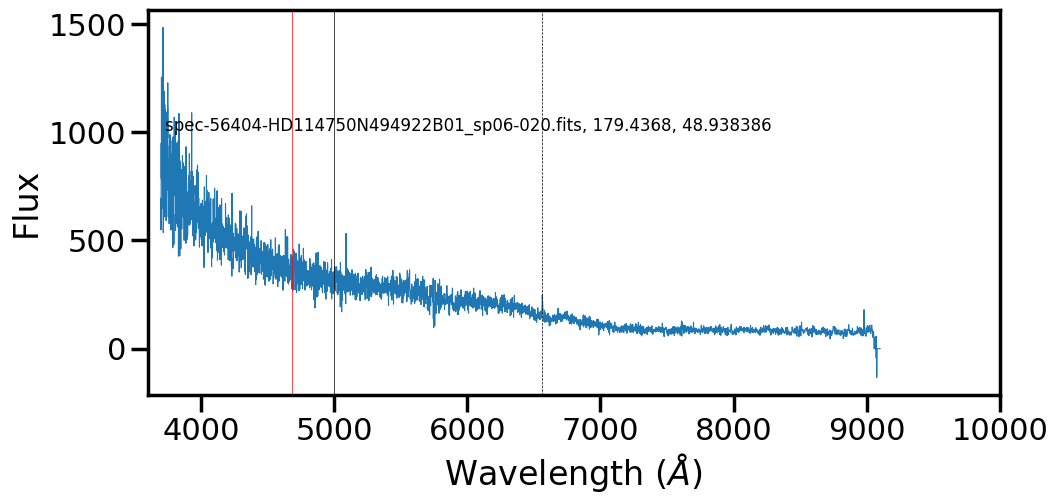

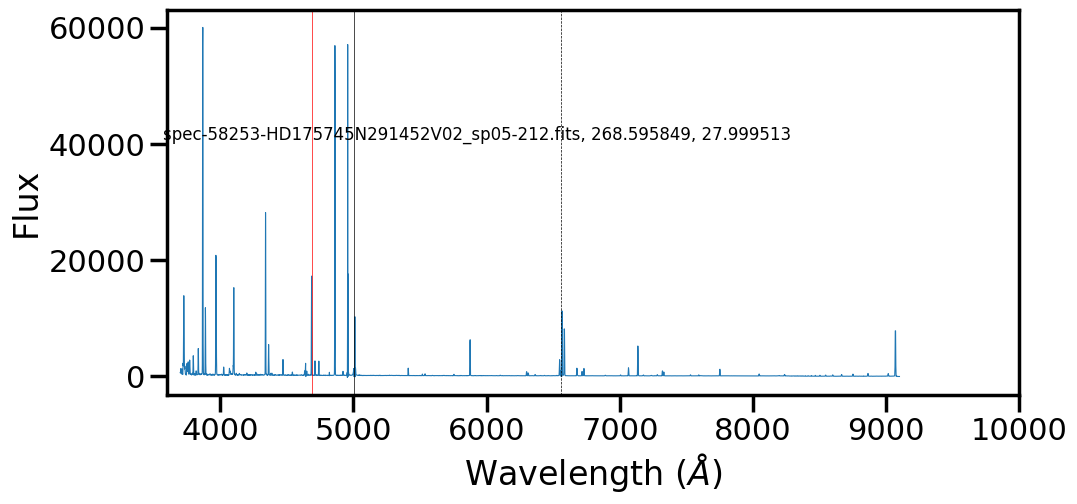

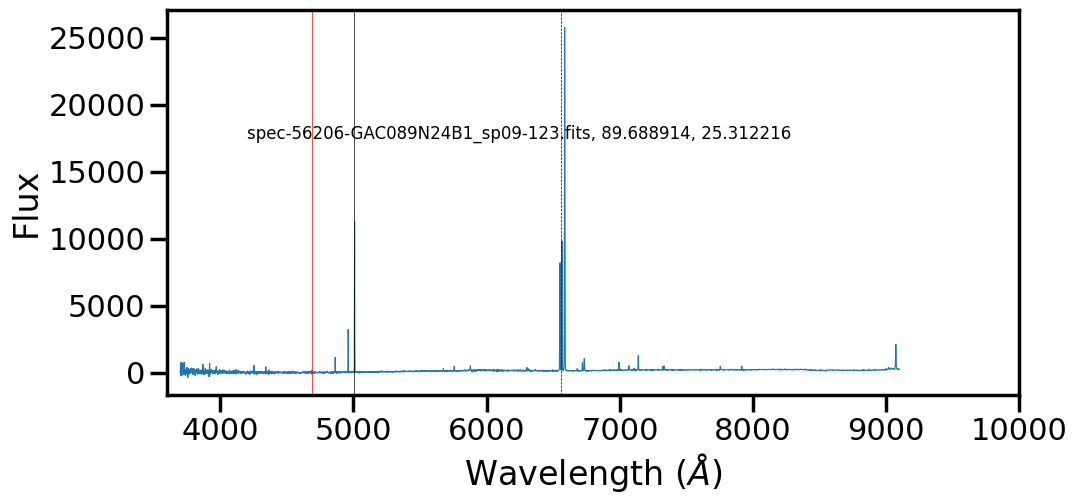

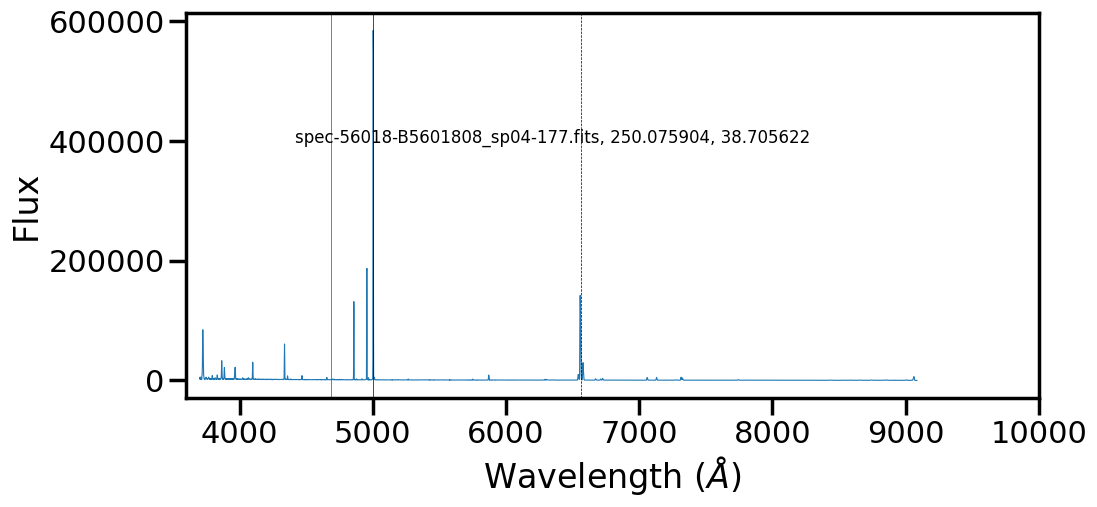

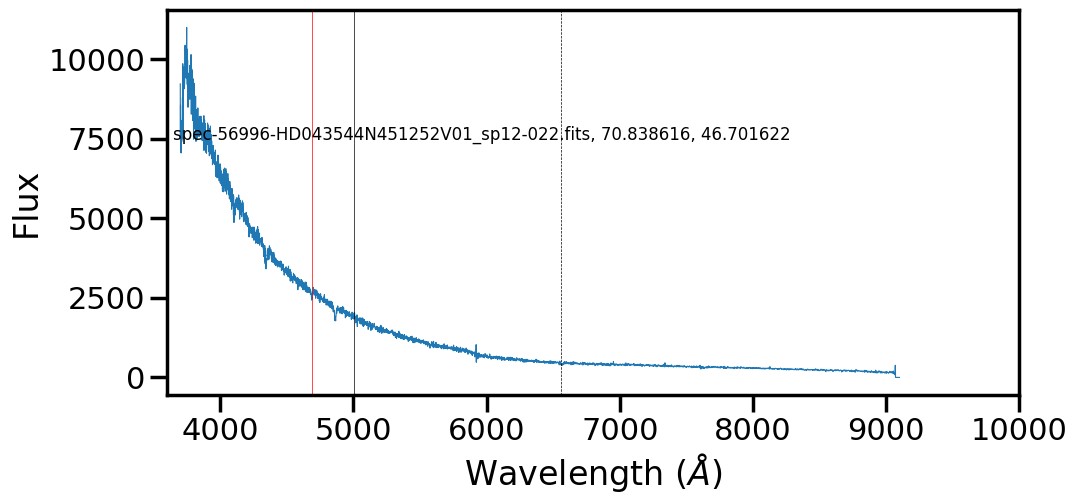

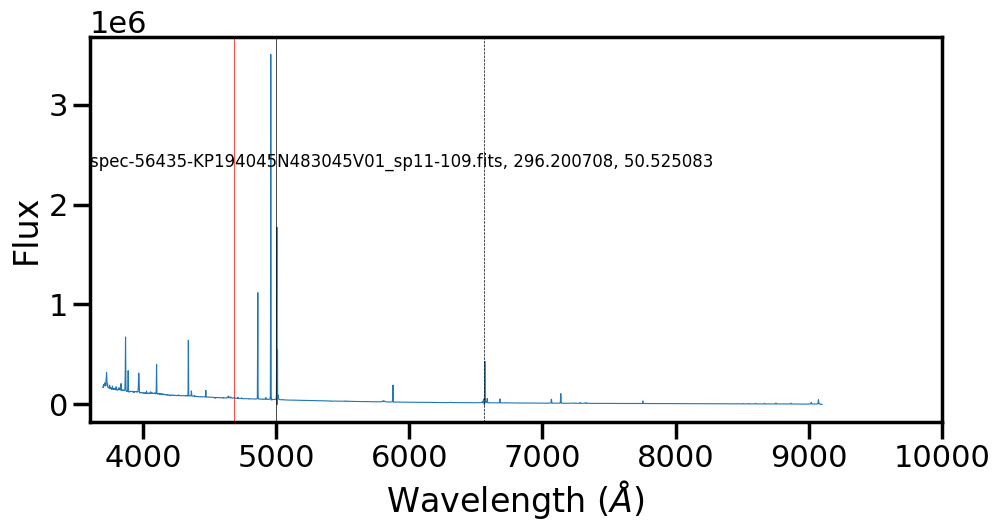

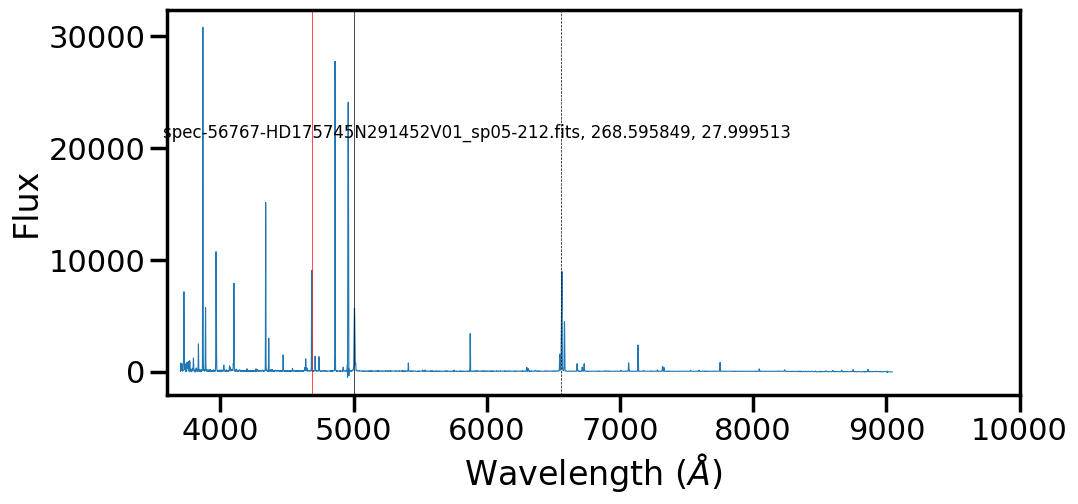

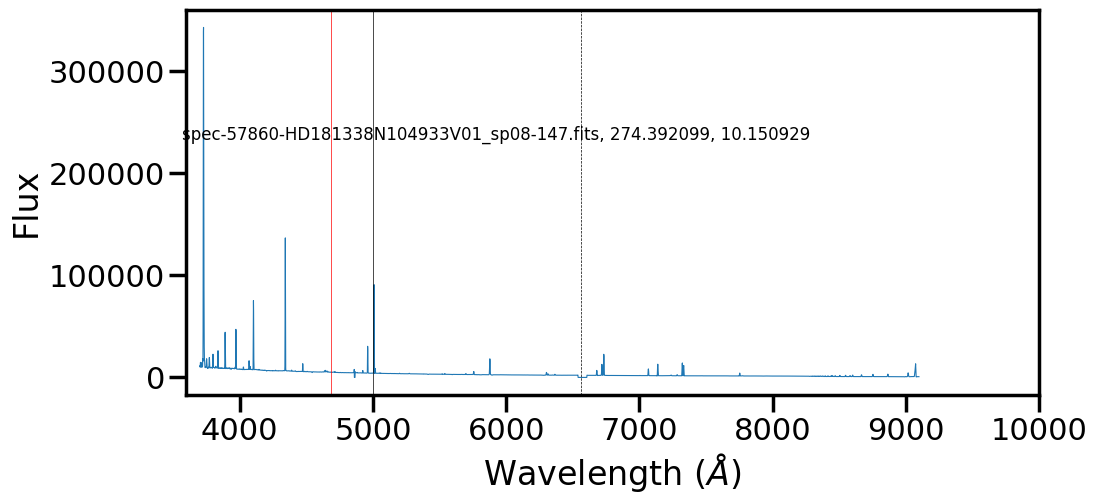

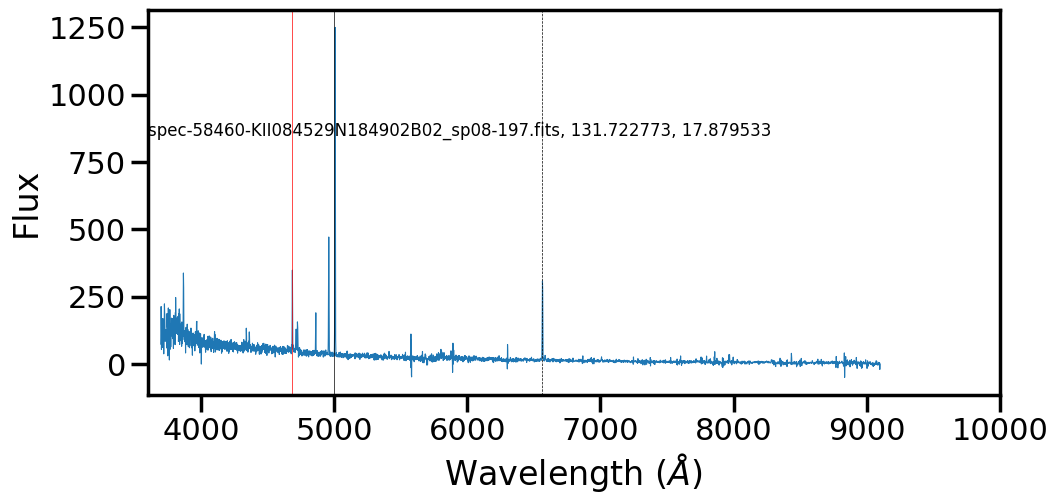

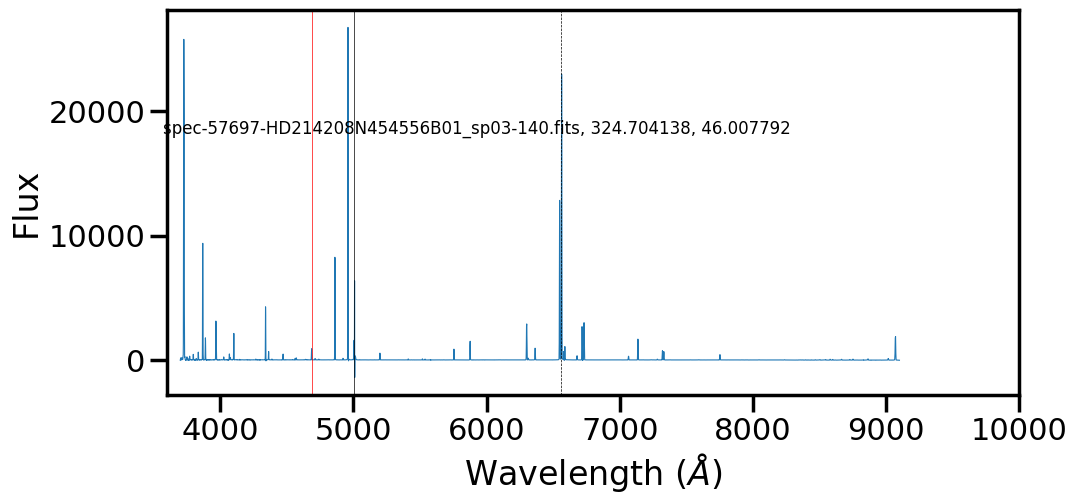

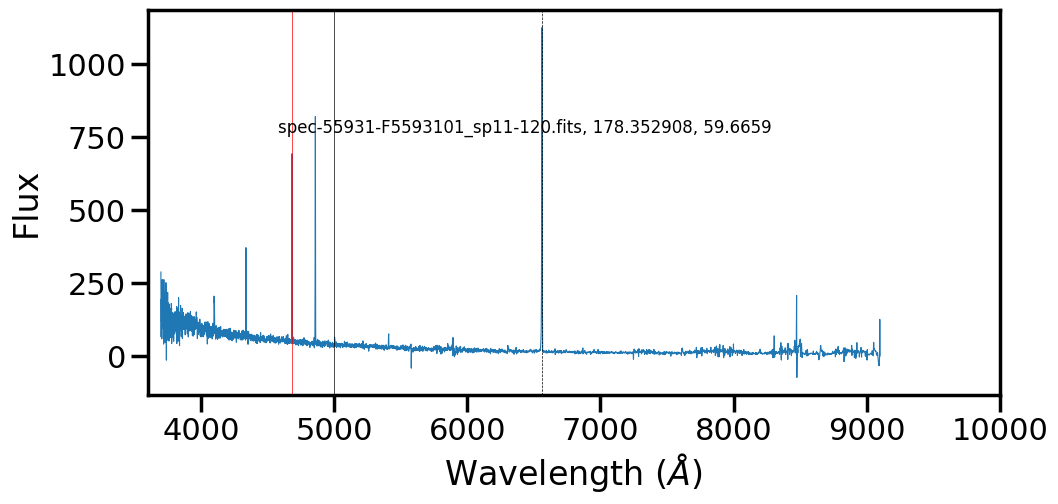

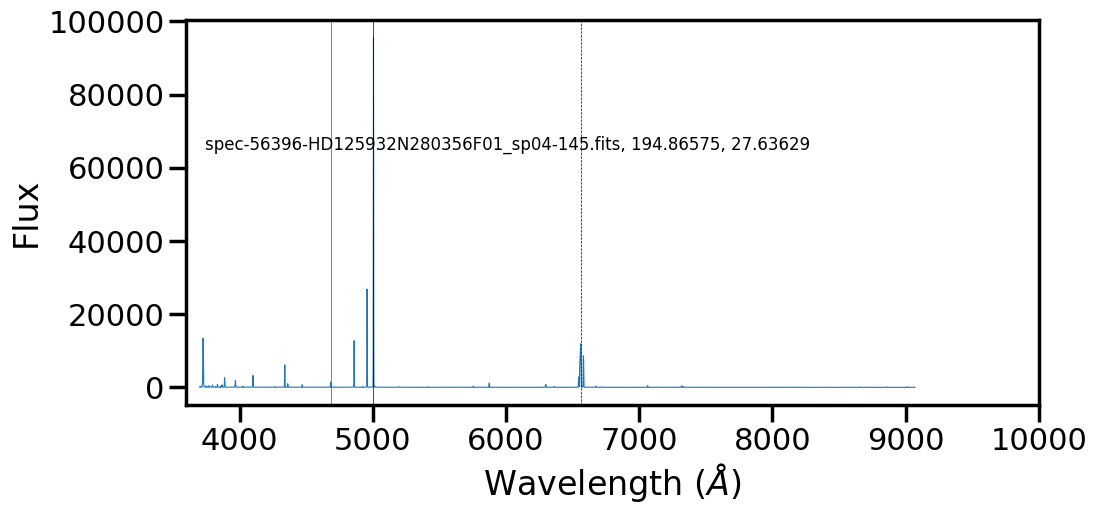

In [69]:
# Find all FITS files in the current directory
fits_files = glob.glob("../True-PN-DR7LAMOST/*.fits")
for file in fits_files:
    spectra(file)
